This is an extgension of the starter notebook. This explores more features than that the inital notebook did not touch on

Additionally there's a dataset from FRED not explored that will be added to the training data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
train_df = pd.read_csv('african-credit-scoring-challenge20241129-14702-1nqro8v/Train.csv')
test_df = pd.read_csv('african-credit-scoring-challenge20241129-14702-1nqro8v/Test.csv')
ecno_df = pd.read_csv('african-credit-scoring-challenge20241129-14702-1nqro8v/economic_indicators.csv')

In [4]:
ids = {col:'object' for col in train_df.columns if any(part.lower() == 'id' for part in col.split('_'))}
dates = [date for date in train_df.columns if any(part.lower() == 'date' for part in date.split('_'))]

train_df = train_df.astype(ids)
train_df[dates] = train_df[dates].apply(pd.to_datetime, errors='coerce')

test_df = test_df.astype(ids)
test_df[dates] = test_df[dates].apply(pd.to_datetime, errors='coerce')


Train data profile

In [5]:
display('Train data', train_df.head(5), train_df.info() ,train_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           68654 non-null  object        
 1   customer_id                  68654 non-null  object        
 2   country_id                   68654 non-null  object        
 3   tbl_loan_id                  68654 non-null  object        
 4   lender_id                    68654 non-null  object        
 5   loan_type                    68654 non-null  object        
 6   Total_Amount                 68654 non-null  float64       
 7   Total_Amount_to_Repay        68654 non-null  float64       
 8   disbursement_date            68654 non-null  datetime64[ns]
 9   due_date                     68654 non-null  datetime64[ns]
 10  duration                     68654 non-null  int64         
 11  New_versus_Repeat            68654 non-nu

'Train data'

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,7,Repeat Loan,120.85,0.014305,121.0,0
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,7,Repeat Loan,7768.50,0.300000,7794.0,0
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,7,Repeat Loan,1380.00,0.200000,1428.0,0
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,7,Repeat Loan,2687.40,0.300000,2770.0,0
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,7,Repeat Loan,1369.20,0.300000,1418.0,0


None

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
count,68654,68654.0,68654,68654.0,68654.0,68654,6.865400e+04,6.865400e+04,68654,68654,68654.000000,68654,6.865400e+04,68654.000000,6.865400e+04,68654.000000
unique,68654,6540.0,1,66520.0,4.0,22,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
top,ID_249117268933267278,247613.0,Kenya,374729.0,267278.0,Type_1,NaN,NaN,NaN,NaN,NaN,Repeat Loan,NaN,NaN,NaN,NaN
freq,1,208.0,68654,2.0,64653.0,61723,NaN,NaN,NaN,NaN,NaN,68087,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.483683e+04,1.563993e+04,2022-10-17 07:55:03.417135360,2022-10-25 20:59:15.638418944,8.544586,NaN,2.545663e+03,0.218679,2.652621e+03,0.018324
min,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+00,0.000000e+00,2021-10-04 00:00:00,2021-10-21 00:00:00,1.000000,NaN,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.295000e+03,2.329000e+03,2022-08-10 00:00:00,2022-08-17 00:00:00,7.000000,NaN,2.340000e+02,0.118712,2.390000e+02,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,5.249000e+03,5.325000e+03,2022-09-16 00:00:00,2022-09-23 00:00:00,7.000000,NaN,9.150000e+02,0.300000,9.340000e+02,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.145000e+04,1.165000e+04,2022-10-24 00:00:00,2022-10-31 00:00:00,7.000000,NaN,2.272650e+03,0.300000,2.317000e+03,0.000000
max,NaN,NaN,NaN,NaN,NaN,NaN,2.300000e+07,2.541500e+07,2024-11-14 00:00:00,2025-10-27 00:00:00,1096.000000,NaN,1.600000e+06,1.168119,1.821338e+06,1.000000


<Axes: xlabel='duration'>

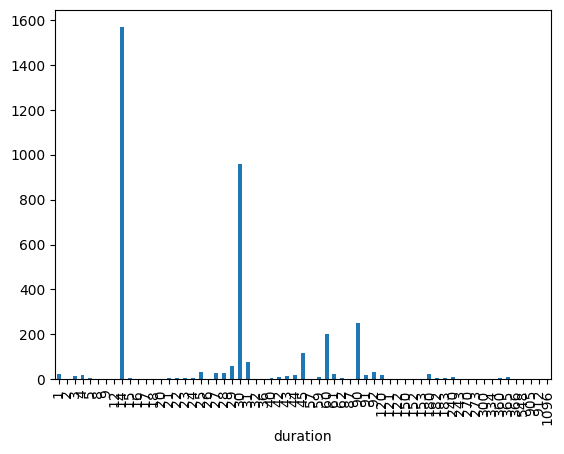

In [6]:
train_df[train_df['duration'] != 7]['duration'].value_counts().sort_index().plot(kind='bar')

Lender ID: 267278


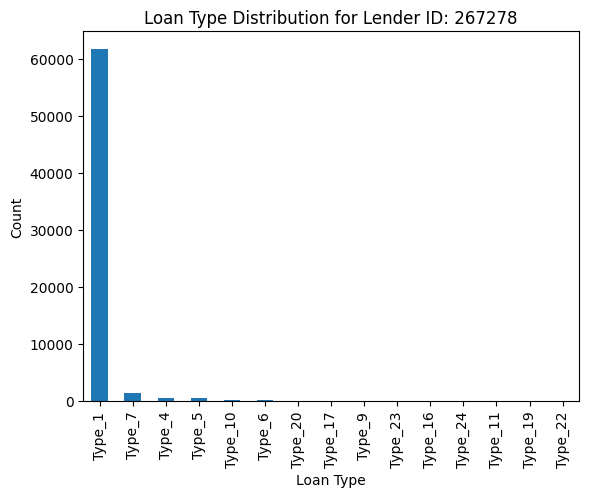

Lender ID: 251804


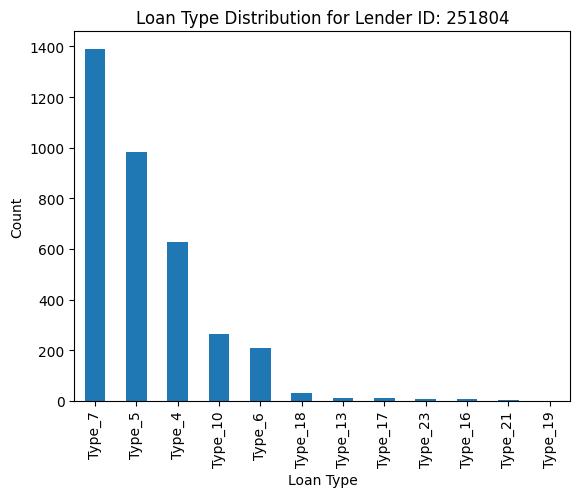

Lender ID: 245684


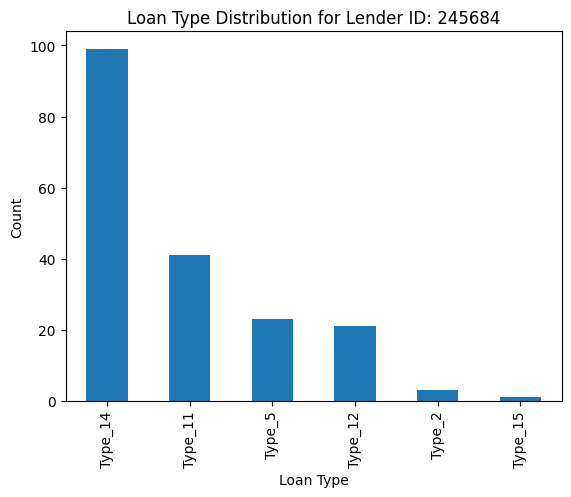

Lender ID: 267277


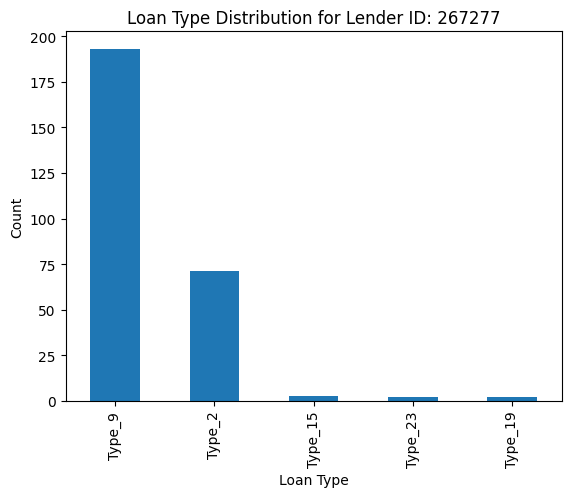

In [19]:
for lender_id in train_df['lender_id'].unique():
    lender_data = train_df[train_df['lender_id'] == lender_id]
    
    print(f'Lender ID: {lender_id}')
    
    # Plot the loan_type distribution for the specific lender_id
    lender_data['loan_type'].value_counts().plot(kind='bar')
    
    plt.xlabel('Loan Type')
    plt.ylabel('Count')
    plt.title(f'Loan Type Distribution for Lender ID: {lender_id}')
    plt.show()

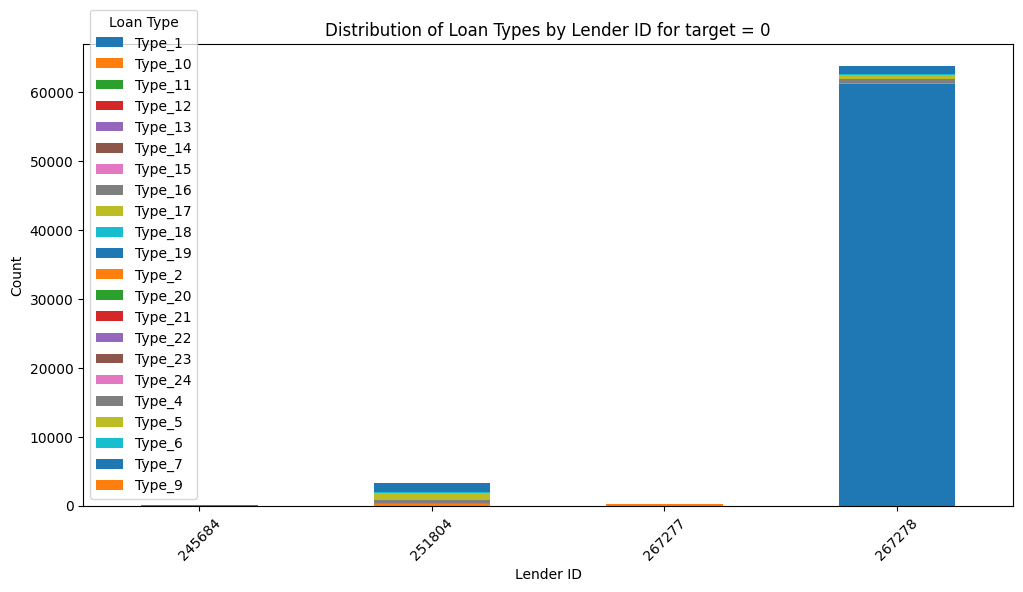

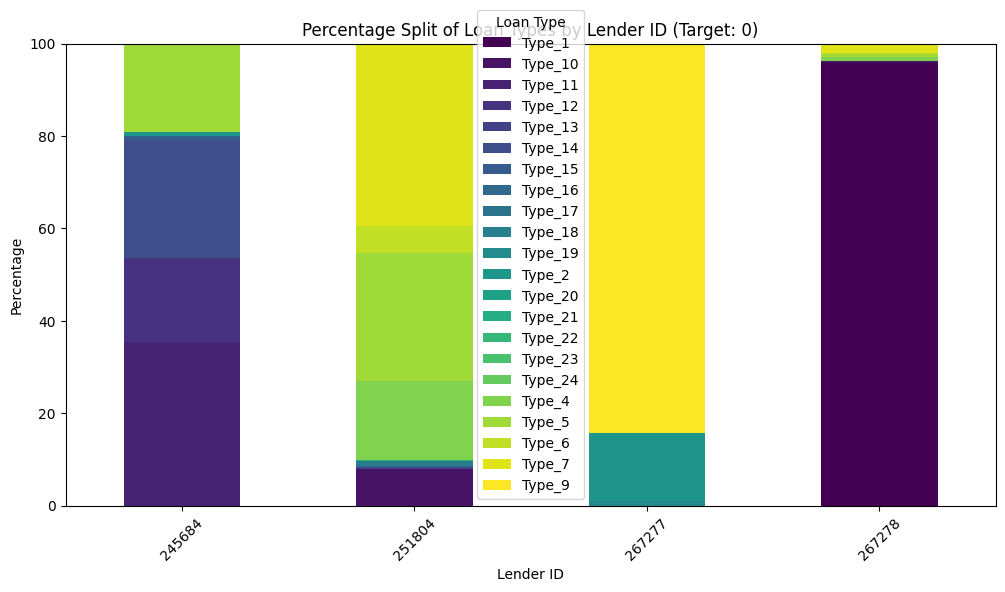

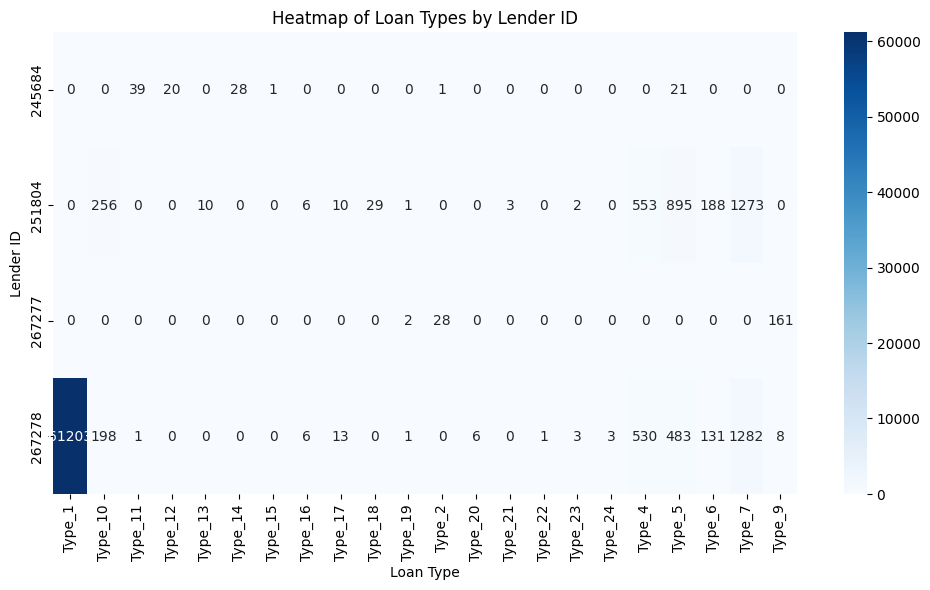

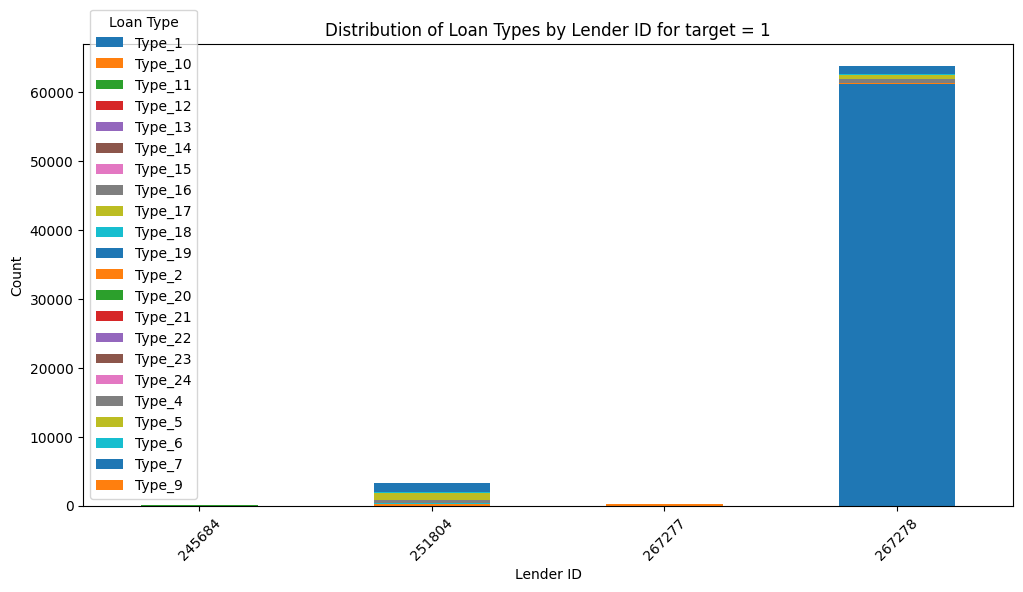

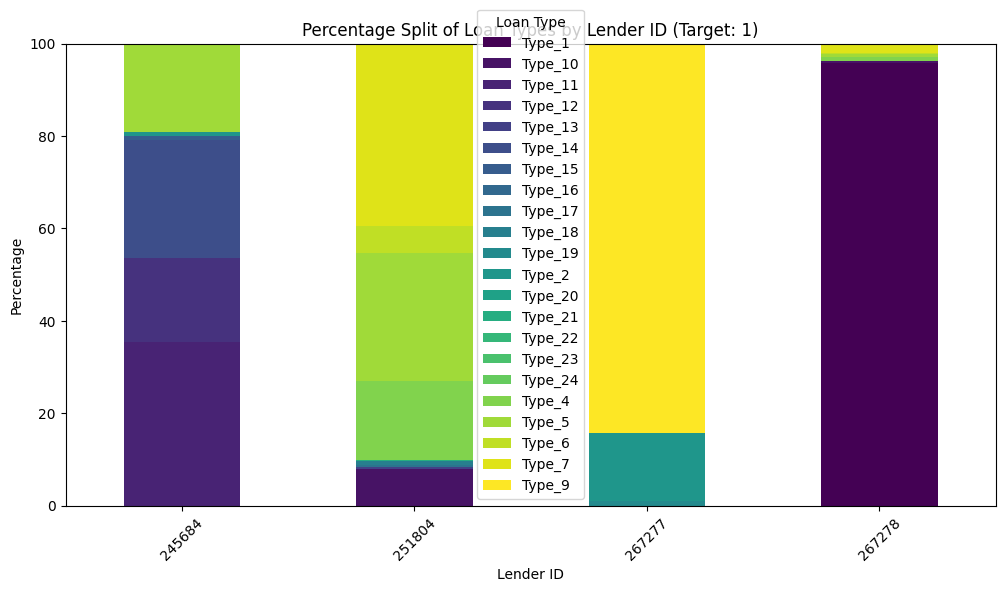

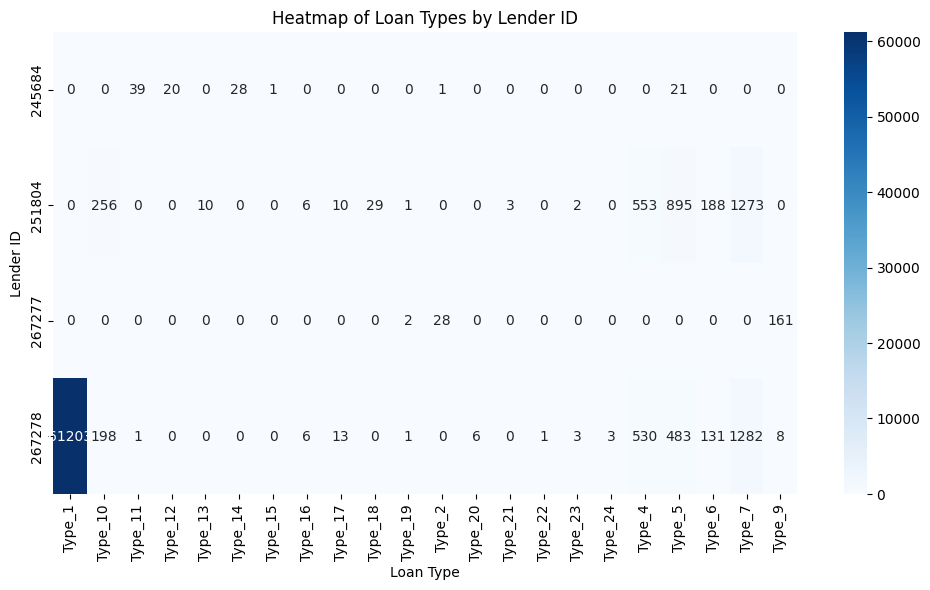

In [27]:
for target_value  in train_df['target'].unique():
    df = train_df[train_df['target']==id]

    # Create a cross-tabulation of lender_id and loan_type
    cross_tab = pd.crosstab(df['lender_id'], df['loan_type'])

    # Plot a stacked bar chart
    cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6))

    plt.xlabel('Lender ID')
    plt.ylabel('Count')
    plt.title(f'Distribution of Loan Types by Lender ID for target = {target_value }')
    plt.legend(title='Loan Type')
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability

    plt.show()
    
    cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

    # Plot a stacked bar chart for percentage split
    cross_tab_percent.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

    plt.xlabel('Lender ID')
    plt.ylabel('Percentage')
    plt.title(f'Percentage Split of Loan Types by Lender ID (Target: {target_value})')
    plt.legend(title='Loan Type')
    plt.xticks(rotation=45)
    plt.ylim(0, 100)  # Ensure y-axis goes from 0 to 100%

    plt.show()
    
    plt.figure(figsize=(12, 6))
    sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')

    plt.xlabel('Loan Type')
    plt.ylabel('Lender ID')
    plt.title('Heatmap of Loan Types by Lender ID')

    plt.show()

In [72]:
id_to_letter = {name: f'lender_{chr(id+ord('A'))}' for id, name in enumerate(train_df['lender_id'].unique())}
df = train_df.copy()
df['lender_id'] = df['lender_id'].map(id_to_letter)
df

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
0,ID_266671248032267278,266671,Kenya,248032,lender_A,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,7,Repeat Loan,120.85,0.014305,121.0,0
1,ID_248919228515267278,248919,Kenya,228515,lender_A,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,7,Repeat Loan,7768.50,0.300000,7794.0,0
2,ID_308486370501251804,308486,Kenya,370501,lender_B,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,7,Repeat Loan,1380.00,0.200000,1428.0,0
3,ID_266004285009267278,266004,Kenya,285009,lender_A,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,7,Repeat Loan,2687.40,0.300000,2770.0,0
4,ID_253803305312267278,253803,Kenya,305312,lender_A,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,7,Repeat Loan,1369.20,0.300000,1418.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68649,ID_244559228408267278,244559,Kenya,228408,lender_A,Type_1,1460.0,1515.0,2022-07-30,2022-08-06,7,Repeat Loan,438.00,0.300000,455.0,0
68650,ID_260062217784267278,260062,Kenya,217784,lender_A,Type_1,5029.0,5116.0,2022-07-16,2022-07-23,7,Repeat Loan,1508.70,0.300000,1535.0,0
68651,ID_259137216701267278,259137,Kenya,216701,lender_A,Type_1,5289.0,5289.0,2022-07-15,2022-07-22,7,Repeat Loan,1586.70,0.300000,1587.0,0
68652,ID_266801303201267278,266801,Kenya,303201,lender_A,Type_1,3334.0,3334.0,2022-11-23,2022-11-30,7,Repeat Loan,741.09,0.222283,741.0,0


In [89]:
loan_map = {loan:loan.split('_')[1] for loan in df['loan_type'].unique()}
df['loan_type'] = df['loan_type'].map(loan_map)
df

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
0,ID_266671248032267278,266671,Kenya,248032,lender_A,1,8448.0,8448.0,2022-08-30,2022-09-06,7,Repeat Loan,120.85,0.014305,121.0,0
1,ID_248919228515267278,248919,Kenya,228515,lender_A,1,25895.0,25979.0,2022-07-30,2022-08-06,7,Repeat Loan,7768.50,0.300000,7794.0,0
2,ID_308486370501251804,308486,Kenya,370501,lender_B,7,6900.0,7142.0,2024-09-06,2024-09-13,7,Repeat Loan,1380.00,0.200000,1428.0,0
3,ID_266004285009267278,266004,Kenya,285009,lender_A,1,8958.0,9233.0,2022-10-20,2022-10-27,7,Repeat Loan,2687.40,0.300000,2770.0,0
4,ID_253803305312267278,253803,Kenya,305312,lender_A,1,4564.0,4728.0,2022-11-28,2022-12-05,7,Repeat Loan,1369.20,0.300000,1418.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68649,ID_244559228408267278,244559,Kenya,228408,lender_A,1,1460.0,1515.0,2022-07-30,2022-08-06,7,Repeat Loan,438.00,0.300000,455.0,0
68650,ID_260062217784267278,260062,Kenya,217784,lender_A,1,5029.0,5116.0,2022-07-16,2022-07-23,7,Repeat Loan,1508.70,0.300000,1535.0,0
68651,ID_259137216701267278,259137,Kenya,216701,lender_A,1,5289.0,5289.0,2022-07-15,2022-07-22,7,Repeat Loan,1586.70,0.300000,1587.0,0
68652,ID_266801303201267278,266801,Kenya,303201,lender_A,1,3334.0,3334.0,2022-11-23,2022-11-30,7,Repeat Loan,741.09,0.222283,741.0,0


In [93]:
numeric_columns = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
df[numeric_columns]

,Total_Amount,Total_Amount_to_Repay,duration,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
0,8448.0,8448.0,7,120.85,0.014305,121.0,0
1,25895.0,25979.0,7,7768.50,0.300000,7794.0,0
2,6900.0,7142.0,7,1380.00,0.200000,1428.0,0
3,8958.0,9233.0,7,2687.40,0.300000,2770.0,0
4,4564.0,4728.0,7,1369.20,0.300000,1418.0,0
...,...,...,...,...,...,...,...
68649,1460.0,1515.0,7,438.00,0.300000,455.0,0
68650,5029.0,5116.0,7,1508.70,0.300000,1535.0,0
68651,5289.0,5289.0,7,1586.70,0.300000,1587.0,0
68652,3334.0,3334.0,7,741.09,0.222283,741.0,0


In [106]:
for lender in df['lender_id'].unique():
    # Filter the DataFrame for the current lender and group by the specified columns
    lender_group = df[df['lender_id'] == lender].groupby(['loan_type', 'lender_id', 'New_versus_Repeat'])[numeric_columns].mean()
    
    # Display the resulting DataFrame for each lender
    print(f"Results for Lender {lender}:")
    display(lender_group)
    print("\n" + "-"*50 + "\n")

Results for Lender lender_A:


Total_Amount  Total_Amount_to_Repay  \
loan_type lender_id New_versus_Repeat                                        
1         lender_A  New Loan           3.578432e+03           3.734587e+03   
                    Repeat Loan        9.586919e+03           9.740465e+03   
10        lender_A  New Loan           3.393900e+04           3.444900e+04   
                    Repeat Loan        1.734091e+05           1.755157e+05   
11        lender_A  Repeat Loan        4.056500e+04           4.340500e+04   
16        lender_A  Repeat Loan        2.768417e+04           2.874633e+04   
17        lender_A  Repeat Loan        1.595977e+04           1.627923e+04   
19        lender_A  Repeat Loan        1.542000e+06           2.374900e+06   
20        lender_A  New Loan           1.200105e+05           1.585875e+05   
                    Repeat Loan        1.841515e+05           2.040384e+05   
22        lender_A  Repeat Loan        4.608000e+04           4.700160e+04   
23        lender_A  Repeat Loan        2.071507e+06           2.179113e+06   
24        lender_A  Repeat Loan        1.833333e+04           1.855933e+04   
4         lender_A  New Loan           1.311600e+05           1.372339e+05   
                    Repeat Loan        1.119390e+05           1.265459e+05   
5         lender_A  New Loan           1.292000e+04           1.371790e+04   
                    Repeat Loan        2.561602e+04           2.795346e+04   
6         lender_A  New Loan           1.390000e+03           1.418000e+03   
                    Repeat Loan        6.474324e+03           6.949439e+03   
7         lender_A  New Loan           4.573389e+03           4.804333e+03   
                    Repeat Loan        1.064997e+04           1.106345e+04   
9         lender_A  Repeat Loan        2.142250e+04           2.391860e+04   

                                          duration  Amount_Funded_By_Lender  \
loan_type lender_id New_versus_Repeat                                         
1         lender_A  New Loan              7.000000               849.029470   
                    Repeat Loan           7.000000              1950.646370   
10        lender_A  New Loan              8.000000              6787.000000   
                    Repeat Loan          30.554455             19701.446980   
11        lender_A  Repeat Loan          30.000000              5000.000000   
16        lender_A  Repeat Loan          10.500000              3229.450000   
17        lender_A  Repeat Loan           7.000000              1802.826923   
19        lender_A  Repeat Loan        1096.000000            250000.000000   
20        lender_A  New Loan             22.000000             22801.500000   
                    Repeat Loan          30.000000             29936.272727   
22        lender_A  Repeat Loan          15.000000             10000.000000   
23        lender_A  Repeat Loan          90.000000            314062.500000   
24        lender_A  Repeat Loan           7.000000             14666.666667   
4         lender_A  New Loan             40.550000              8277.805500   
                    Repeat Loan          52.279387             23750.132027   
5         lender_A  New Loan             12.600000              1515.824000   
                    Repeat Loan          13.794118              3656.719451   
6         lender_A  New Loan              7.000000               261.500000   
                    Repeat Loan           7.000000              1044.974207   
7         lender_A  New Loan              7.000000              1004.041667   
                    Repeat Loan           7.000000              2126.525602   
9         lender_A  Repeat Loan          35.000000              3318.333333   

                                       Lender_portion_Funded  \
loan_type lender_id New_versus_Repeat                          
1         lender_A  New Loan                        0.234638   
                    Repeat Loan                     0.220012   
10        len


--------------------------------------------------

Results for Lender lender_B:


Total_Amount  Total_Amount_to_Repay  \
loan_type lender_id New_versus_Repeat                                        
10        lender_B  New Loan           1.279691e+05           1.298886e+05   
                    Repeat Loan        1.734879e+05           1.757057e+05   
13        lender_B  Repeat Loan        5.014000e+02           4.829980e+02   
16        lender_B  Repeat Loan        2.768417e+04           2.874633e+04   
17        lender_B  Repeat Loan        1.230240e+04           1.254870e+04   
18        lender_B  Repeat Loan        5.959500e+03           6.204167e+03   
19        lender_B  Repeat Loan        1.542000e+06           2.374900e+06   
21        lender_B  Repeat Loan        2.963333e+05           3.071200e+05   
23        lender_B  Repeat Loan        1.972101e+06           2.073896e+06   
4         lender_B  New Loan           3.311579e+04           3.621413e+04   
                    Repeat Loan        1.153411e+05           1.303201e+05   
5         lender_B  New Loan           1.397273e+04           1.479050e+04   
                    Repeat Loan        2.823269e+04           3.038663e+04   
6         lender_B  New Loan           4.323750e+03           4.581333e+03   
                    Repeat Loan        6.427066e+03           6.864760e+03   
7         lender_B  New Loan           4.511692e+03           4.768769e+03   
                    Repeat Loan        1.092877e+04           1.135225e+04   

                                          duration  Amount_Funded_By_Lender  \
loan_type lender_id New_versus_Repeat                                         
10        lender_B  New Loan             35.000000             16034.343333   
                    Repeat Loan          30.361538             16512.446923   
13        lender_B  Repeat Loan          30.000000               116.700000   
16        lender_B  Repeat Loan          10.500000              3229.450000   
17        lender_B  Repeat Loan           7.000000              1413.000000   
18        lender_B  Repeat Loan          30.000000              1191.800000   
19        lender_B  Repeat Loan        1096.000000            250000.000000   
21        lender_B  Repeat Loan          30.000000             21534.146667   
23        lender_B  Repeat Loan          90.000000             96253.500000   
4         lender_B  New Loan             32.315789              7015.684211   
                    Repeat Loan          52.656814             14105.496650   
5         lender_B  New Loan             12.727273              2124.429091   
                    Repeat Loan          13.733539              3938.104136   
6         lender_B  New Loan             10.833333               921.666667   
                    Repeat Loan           7.348485              1178.805505   
7         lender_B  New Loan              7.000000               959.192308   
                    Repeat Loan           7.000000              2178.273244   

                                       Lender_portion_Funded  \
loan_type lender_id New_versus_Repeat                          
10        lender_B  New Loan                        0.123311   
                    Repeat Loan                     0.127667   
13        lender_B  Repeat Loan                     0.232841   
16        lender_B  Repeat Loan                     0.116667   
17        lender_B  Repeat Loan                     0.112505   
18        lender_B  Repeat Loan                     0.199962   
19        lender_B  Repeat Loan                     0.162127   
21        lender_B  Repeat Loan                     0.070756   
23        lender_B  Repeat Loan                     0.068772   
4         lender_B  New Loan                        0.216658   
                    Repeat Loan                     0.180053   
5         lender_B  New Loan                        0.159749   
                    Repeat Loan                     0.152408   
6         lender_B  New Loan                        0.203276   
                    Repeat Loa


--------------------------------------------------

Results for Lender lender_C:


Total_Amount  Total_Amount_to_Repay  \
loan_type lender_id New_versus_Repeat                                        
11        lender_C  New Loan           5.000000e+03           5.571000e+03   
                    Repeat Loan        1.134330e+04           1.239445e+04   
12        lender_C  New Loan           1.000000e+04           1.062500e+04   
                    Repeat Loan        1.851176e+04           1.957868e+04   
14        lender_C  New Loan           9.240506e+03           1.017280e+04   
                    Repeat Loan        1.053000e+04           1.149775e+04   
15        lender_C  Repeat Loan        1.500000e+07           1.974894e+07   
2         lender_C  New Loan           3.000000e+03           3.210000e+03   
                    Repeat Loan        9.500000e+03           1.056200e+04   
5         lender_C  New Loan           1.460000e+04           1.549533e+04   
                    Repeat Loan        2.475000e+04           2.614155e+04   

                                         duration  Amount_Funded_By_Lender  \
loan_type lender_id New_versus_Repeat                                        
11        lender_C  New Loan            30.000000              5000.000000   
                    Repeat Loan         30.000000              7024.325000   
12        lender_C  New Loan            18.000000             10000.000000   
                    Repeat Loan         12.764706             18511.764706   
14        lender_C  New Loan            30.000000              9240.506329   
                    Repeat Loan         30.000000             10530.000000   
15        lender_C  Repeat Loan        548.000000             10000.000000   
2         lender_C  New Loan            30.000000              3000.000000   
                    Repeat Loan         30.000000              9500.000000   
5         lender_C  New Loan            14.000000              9833.333333   
                    Repeat Loan         14.000000              9750.000000   

                                       Lender_portion_Funded  \
loan_type lender_id New_versus_Repeat                          
11        lender_C  New Loan                        1.000000   
                    Repeat Loan                     0.840109   
12        lender_C  New Loan                        1.000000   
                    Repeat Loan                     1.000000   
14        lender_C  New Loan                        1.000000   
                    Repeat Loan                     1.000000   
15        lender_C  Repeat Loan                     0.000667   
2         lender_C  New Loan                        1.000000   
                    Repeat Loan                     1.000000   
5         lender_C  New Loan                        0.795847   
                    Repeat Loan                     0.535192   

                                       Lender_portion_to_be_repaid    target  
loan_type lender_id New_versus_Repeat                                         
11        lender_C  New Loan                           5571.000000  1.000000  
                    Repeat Loan                        7752.975000  0.025000  
12        lender_C  New Loan                          10625.000000  0.000000  
                    Repeat Loan                       19578.705882  0.058824  
14        lender_C  New Loan                          10172.797468  0.759494  
                    Repeat Loan                       11497.750000  0.550000  
15        lender_C  Repeat Loan                       13166.000000  0.000000  
2         lender_C  New Loan                           3210.000000  0.000000  
                    Repeat Loan                       10562.000000  1.000000  
5         lender_C  New Loan                          10468.000000  0.333333  
                    Repeat Loan                       10317.000000  0.050000


--------------------------------------------------

Results for Lender lender_D:


Total_Amount  Total_Amount_to_Repay  \
loan_type lender_id New_versus_Repeat                                        
15        lender_D  Repeat Loan        1.549091e+07           1.780577e+07   
19        lender_D  New Loan           5.156650e+05           8.272900e+05   
                    Repeat Loan        5.147000e+05           8.254650e+05   
2         lender_D  New Loan           2.057143e+05           2.420234e+05   
                    Repeat Loan        3.130234e+05           3.826712e+05   
23        lender_D  Repeat Loan        4.127025e+05           4.343694e+05   
9         lender_D  New Loan           1.617349e+04           1.913717e+04   
                    Repeat Loan        5.029388e+04           5.654203e+04   

                                         duration  Amount_Funded_By_Lender  \
loan_type lender_id New_versus_Repeat                                        
15        lender_D  Repeat Loan        181.666667            203566.666667   
19        lender_D  New Loan           905.000000             50000.000000   
                    Repeat Loan        912.000000              7000.000000   
2         lender_D  New Loan           185.285714             34788.682857   
                    Repeat Loan        180.328125             32564.851406   
23        lender_D  Repeat Loan         90.000000              9500.000000   
9         lender_D  New Loan            24.250000              6748.712500   
                    Repeat Loan         34.464865             11792.557189   

                                       Lender_portion_Funded  \
loan_type lender_id New_versus_Repeat                          
15        lender_D  Repeat Loan                     0.013712   
19        lender_D  New Loan                        0.096962   
                    Repeat Loan                     0.013600   
2         lender_D  New Loan                        0.191314   
                    Repeat Loan                     0.163301   
23        lender_D  Repeat Loan                     0.025822   
9         lender_D  New Loan                        0.506443   
                    Repeat Loan                     0.369510   

                                       Lender_portion_to_be_repaid    target  
loan_type lender_id New_versus_Repeat                                         
15        lender_D  Repeat Loan                      250570.333333  1.000000  
19        lender_D  New Loan                          80216.000000  0.000000  
                    Repeat Loan                       11228.000000  0.000000  
2         lender_D  New Loan                          42435.000000  0.714286  
                    Repeat Loan                       39856.046875  0.593750  
23        lender_D  Repeat Loan                        9999.000000  1.000000  
9         lender_D  New Loan                           8635.625000  0.375000  
                    Repeat Loan                       13056.572973  0.156757


--------------------------------------------------



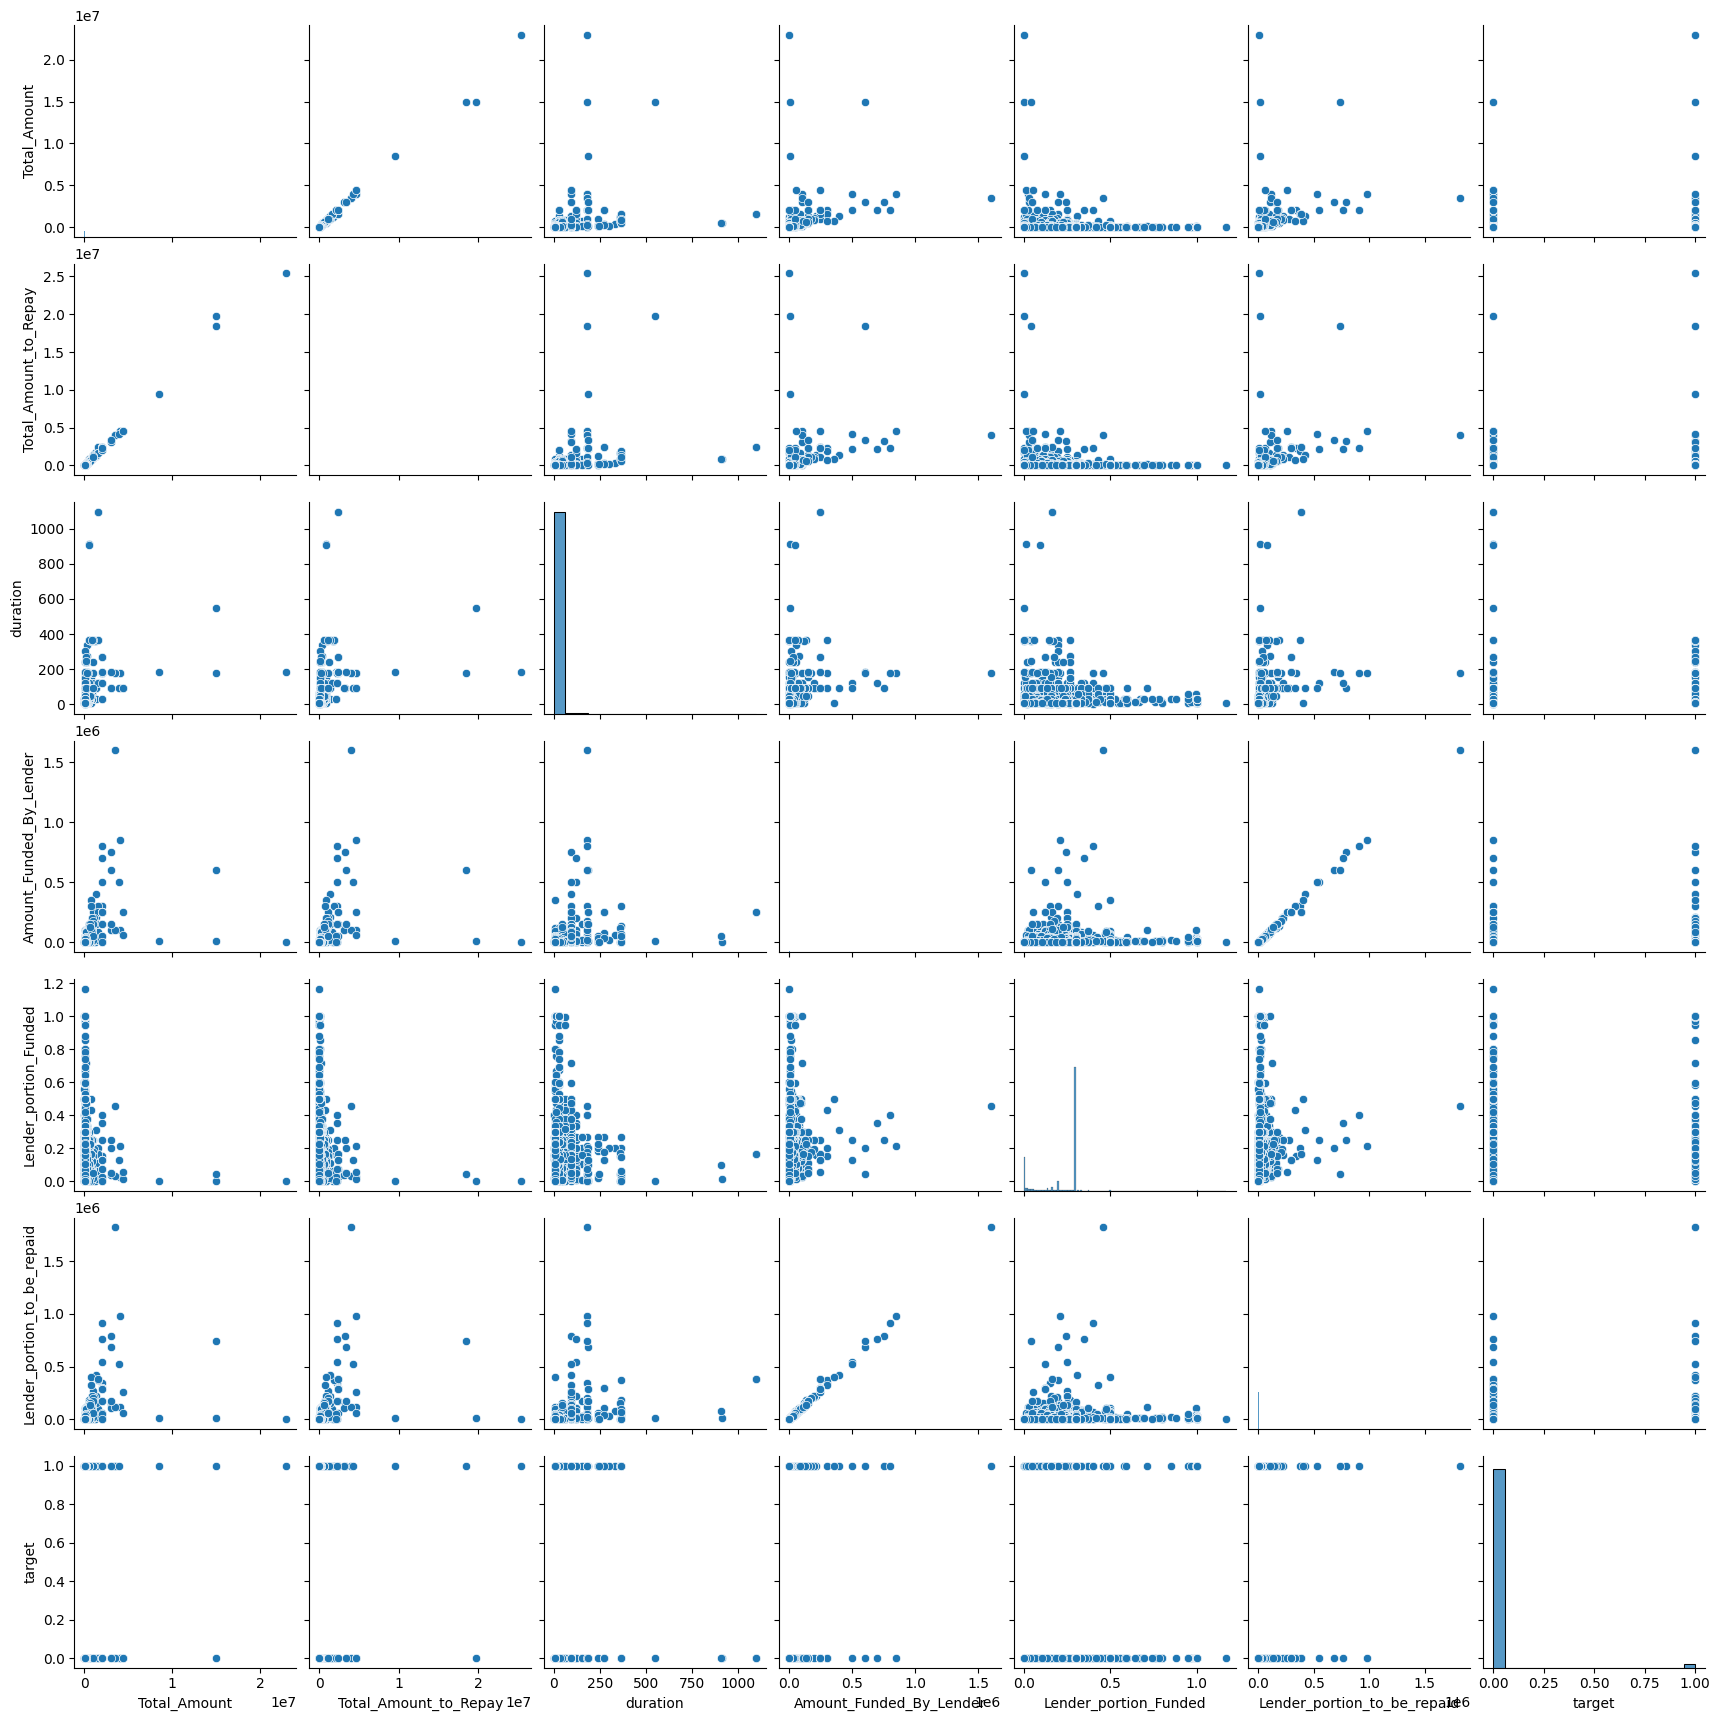

In [107]:
sns.pairplot(df[numeric_columns])

In [117]:
df[df['Lender_portion_Funded']<0.1].groupby(['loan_type', 'lender_id', 'New_versus_Repeat'])[numeric_columns].mean()

Total_Amount  Total_Amount_to_Repay  \
loan_type lender_id New_versus_Repeat                                        
1         lender_A  New Loan           2.741054e+03           2.777107e+03   
                    Repeat Loan        1.172351e+04           1.192829e+04   
10        lender_A  Repeat Loan        2.189550e+05           2.216336e+05   
          lender_B  Repeat Loan        2.313910e+05           2.339583e+05   
15        lender_C  Repeat Loan        1.500000e+07           1.974894e+07   
          lender_D  Repeat Loan        1.549091e+07           1.780577e+07   
16        lender_A  Repeat Loan        3.506200e+04           3.629000e+04   
          lender_B  Repeat Loan        3.506200e+04           3.629000e+04   
17        lender_A  Repeat Loan        9.987667e+03           1.018800e+04   
          lender_B  Repeat Loan        9.987667e+03           1.018800e+04   
19        lender_D  New Loan           5.156650e+05           8.272900e+05   
                    Repeat Loan        5.147000e+05           8.254650e+05   
2         lender_D  New Loan           1.300000e+05           1.584985e+05   
                    Repeat Loan        4.740385e+05           5.797115e+05   
20        lender_A  Repeat Loan        2.152800e+05           2.260440e+05   
21        lender_B  Repeat Loan        2.845000e+05           2.958800e+05   
23        lender_A  Repeat Loan        4.408789e+06           4.607185e+06   
          lender_B  Repeat Loan        2.278008e+06           2.396050e+06   
          lender_D  Repeat Loan        4.127025e+05           4.343694e+05   
4         lender_A  New Loan           5.380000e+05           5.545348e+05   
                    Repeat Loan        1.382087e+05           1.601363e+05   
          lender_B  Repeat Loan        4.175802e+05           4.744625e+05   
5         lender_A  New Loan           1.200000e+04           1.270000e+04   
                    Repeat Loan        3.051374e+04           3.347160e+04   
          lender_B  New Loan           2.000000e+04           2.110000e+04   
                    Repeat Loan        6.119867e+04           6.489849e+04   
6         lender_A  Repeat Loan        1.039155e+04           1.236587e+04   
          lender_B  Repeat Loan        1.895833e+04           2.103303e+04   
7         lender_A  Repeat Loan        1.182740e+04           1.224180e+04   
          lender_B  Repeat Loan        1.941220e+04           2.009210e+04   
9         lender_A  Repeat Loan        2.200000e+04           2.332000e+04   
          lender_D  New Loan           3.000000e+04           3.180000e+04   
                    Repeat Loan        1.475640e+05           1.671940e+05   

                                         duration  Amount_Funded_By_Lender  \
loan_type lender_id New_versus_Repeat                                        
1         lender_A  New Loan             7.000000                48.588214   
                    Repeat Loan          7.000000               175.199184   
10        lender_A  Repeat Loan         36.223881              9527.104627   
          lender_B  Repeat Loan         39.310680             10583.584951   
15        lender_C  Repeat Loan        548.000000             10000.000000   
          lender_D  Repeat Loan        181.666667            203566.666667   
16        lender_A  Repeat Loan          7.000000              3506.200000   
          lender_B  Repeat Loan          7.000000              3506.200000   
17        lender_A  Repeat Loan          7.000000               832.333333   
          lender_B  Repeat Loan          7.000000               832.333333   
19        lender_D  New Loan           905.000000             50000.000000   
                    Repeat Loan        912.000000              7000.000000   
2         lender_D  New Loan           166.000000              7025.045000   
                    Repeat Loan        215.423077             12944.121538   
20        lender_A  Repeat Loan         30.000000           

In [73]:
total_loans = df.pivot_table(
    index='lender_id',
    columns='loan_type',
    values='target',
    aggfunc='count',
    fill_value=0,
    margins=True,  # Adds row and column totals
    margins_name='Total'
)

total_loans

loan_type,Type_1,Type_10,Type_11,Type_12,Type_13,Type_14,Type_15,Type_16,Type_17,Type_18,...,Type_21,Type_22,Type_23,Type_24,Type_4,Type_5,Type_6,Type_7,Type_9,Total
lender_id,,,,,,,,,,,,,,,,,,,,,
lender_A,61723,203,1,0,0,0,0,6,13,0,...,0,1,8,3,607,515,147,1400,12,64653
lender_B,0,263,0,0,10,0,0,6,10,30,...,3,0,8,0,628,983,210,1390,0,3542
lender_C,0,0,41,21,0,99,1,0,0,0,...,0,0,0,0,0,23,0,0,0,188
lender_D,0,0,0,0,0,0,3,0,0,0,...,0,0,2,0,0,0,0,0,193,271
Total,61723,466,42,21,10,99,4,12,23,30,...,3,1,18,3,1235,1521,357,2790,205,68654


In [77]:
avg_loan_values = df.pivot_table(
    index='lender_id',
    columns='loan_type',
    values='Total_Amount',
    aggfunc='mean',
    fill_value=0,
    margins=True,  # Adds row and column totals
    margins_name='Average'
)

avg_loan_values

loan_type,Type_1,Type_10,Type_11,Type_12,Type_13,Type_14,Type_15,Type_16,Type_17,Type_18,...,Type_21,Type_22,Type_23,Type_24,Type_4,Type_5,Type_6,Type_7,Type_9,Average
lender_id,,,,,,,,,,,,,,,,,,,,,
lender_A,9561.2194,172722.052118,40565.000000,0.00000,0.0,0.000000,0.0,27684.166667,15959.769231,0.0,...,0.000000,46080.0,2.071507e+06,18333.333333,112572.355848,25492.755340,6405.149660,10337.462143,21422.500000,11495.769037
lender_B,0.0000,172968.701179,0.000000,0.00000,501.4,0.000000,0.0,27684.166667,12302.400000,5959.5,...,296333.333333,0.0,1.972101e+06,0.000000,112853.421975,28073.121058,6306.876190,10688.707194,0.000000,50485.905536
lender_C,0.0000,0.000000,11188.585366,16890.47619,0.0,9501.010101,15000000.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000e+00,0.000000,0.000000,23426.086957,0.000000,0.000000,0.000000,92100.170213
lender_D,0.0000,0.000000,0.000000,0.00000,0.0,0.000000,15490914.0,0.000000,0.000000,0.0,...,0.000000,0.0,4.127025e+05,0.000000,0.000000,0.000000,0.000000,0.000000,48879.558964,292382.903616
Average,9561.2194,172861.255343,11888.023810,16890.47619,501.4,9501.010101,15368185.5,27684.166667,14369.608696,5959.5,...,296333.333333,46080.0,1.843015e+06,18333.333333,112715.278543,27129.156476,6347.341737,10512.455197,47272.316488,14836.828617


In [74]:
default_loans = df[df['target'] == 1].pivot_table(
    index='lender_id',
    columns='loan_type',
    values='target',
    aggfunc='count',
    fill_value=0,
    margins=True,  # Adds row and column totals
    margins_name='Total'
)
default_loans

loan_type,Type_1,Type_10,Type_11,Type_12,Type_14,Type_15,Type_18,Type_2,Type_20,Type_23,Type_4,Type_5,Type_6,Type_7,Type_9,Total
lender_id,,,,,,,,,,,,,,,,
lender_A,520,5,0,0,0,0,0,0,7,5,77,32,16,118,4,784
lender_B,0,7,0,0,0,0,1,0,0,6,75,88,22,117,0,316
lender_C,0,0,2,1,71,0,0,2,0,0,0,2,0,0,0,78
lender_D,0,0,0,0,0,3,0,43,0,2,0,0,0,0,32,80
Total,520,12,2,1,71,3,1,45,7,13,152,122,38,235,36,1258


In [78]:
avg_default_values = df[df['target'] == 1].pivot_table(
    index='lender_id',
    columns='loan_type',
    values='Total_Amount',
    aggfunc='mean',
    fill_value=0,
    margins=True,  # Adds row and column totals
    margins_name='Average'
)

avg_default_values

loan_type,Type_1,Type_10,Type_11,Type_12,Type_14,Type_15,Type_18,Type_2,Type_20,Type_23,Type_4,Type_5,Type_6,Type_7,Type_9,Average
lender_id,,,,,,,,,,,,,,,,
lender_A,11379.721154,72421.672000,0.0,0.0,0.000000,0.0,0.0,0.000000,184726.0,2.142034e+06,237667.532468,34737.500000,6618.750000,8014.584746,11828.0000,49481.821888
lender_B,0.000000,123266.755714,0.0,0.0,0.000000,0.0,9000.0,0.000000,0.0,1.749409e+06,154916.666667,33165.056818,8184.636364,8885.213675,0.0000,85839.330032
lender_C,0.000000,0.000000,16125.0,30500.0,9295.774648,0.0,0.0,9500.000000,0.0,0.000000e+00,0.000000,15600.000000,0.000000,0.000000,0.0000,9909.615385
lender_D,0.000000,0.000000,0.0,0.0,0.000000,15490914.0,0.0,315581.395349,0.0,4.127025e+05,0.000000,0.000000,0.000000,0.000000,104041.5275,802468.448500
Average,11379.721154,102081.304167,16125.0,30500.0,9295.774648,15490914.0,9000.0,301977.777778,184726.0,1.694771e+06,196836.513158,33289.549180,7525.315789,8448.046809,93795.5800,104045.629992


In [75]:
default_percentage = (default_loans / total_loans) * 100
default_percentage.fillna(0)

loan_type,Total,Type_1,Type_10,Type_11,Type_12,Type_13,Type_14,Type_15,Type_16,Type_17,...,Type_20,Type_21,Type_22,Type_23,Type_24,Type_4,Type_5,Type_6,Type_7,Type_9
lender_id,,,,,,,,,,,,,,,,,,,,,
lender_A,1.212627,0.842474,2.463054,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,53.846154,0.0,0.0,62.500000,0.0,12.685338,6.213592,10.884354,8.428571,33.333333
lender_B,8.921513,0.000000,2.661597,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,75.000000,0.0,11.942675,8.952187,10.476190,8.417266,0.000000
lender_C,41.489362,0.000000,0.000000,4.878049,4.761905,0.0,71.717172,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,8.695652,0.000000,0.000000,0.000000
lender_D,29.520295,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,100.0,0.0,0.0,...,0.000000,0.0,0.0,100.000000,0.0,0.000000,0.000000,0.000000,0.000000,16.580311
Total,1.832377,0.842474,2.575107,4.761905,4.761905,0.0,71.717172,75.0,0.0,0.0,...,53.846154,0.0,0.0,72.222222,0.0,12.307692,8.021039,10.644258,8.422939,17.560976


In [76]:
default_percentage[default_loans.columns].fillna(0)

loan_type,Type_1,Type_10,Type_11,Type_12,Type_14,Type_15,Type_18,Type_2,Type_20,Type_23,Type_4,Type_5,Type_6,Type_7,Type_9,Total
lender_id,,,,,,,,,,,,,,,,
lender_A,0.842474,2.463054,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,53.846154,62.500000,12.685338,6.213592,10.884354,8.428571,33.333333,1.212627
lender_B,0.000000,2.661597,0.000000,0.000000,0.000000,0.0,3.333333,0.000000,0.000000,75.000000,11.942675,8.952187,10.476190,8.417266,0.000000,8.921513
lender_C,0.000000,0.000000,4.878049,4.761905,71.717172,0.0,0.000000,66.666667,0.000000,0.000000,0.000000,8.695652,0.000000,0.000000,0.000000,41.489362
lender_D,0.000000,0.000000,0.000000,0.000000,0.000000,100.0,0.000000,60.563380,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,16.580311,29.520295
Total,0.842474,2.575107,4.761905,4.761905,71.717172,75.0,3.333333,60.810811,53.846154,72.222222,12.307692,8.021039,10.644258,8.422939,17.560976,1.832377


<Axes: ylabel='Density'>

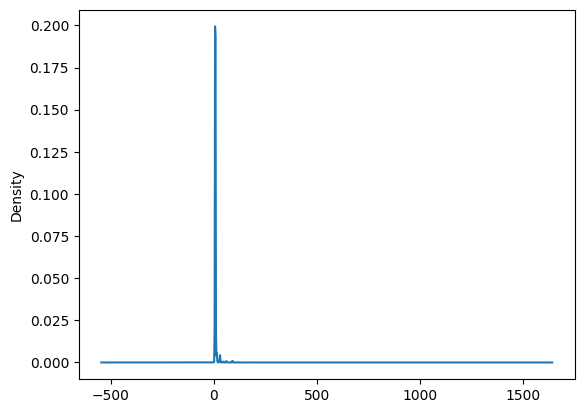

In [87]:
df['duration'].plot(kind='kde')

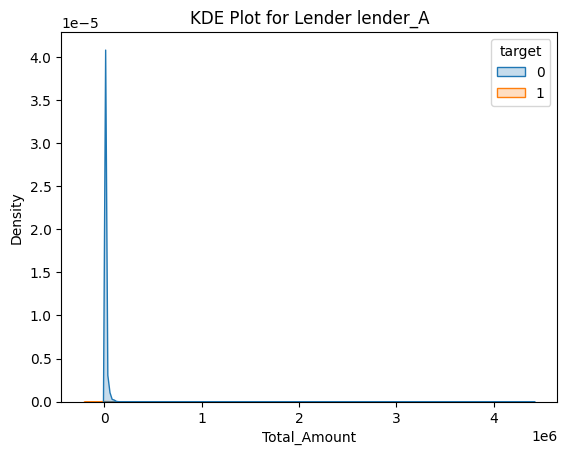

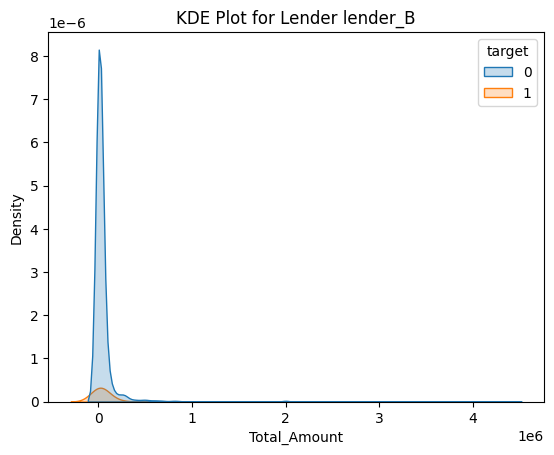

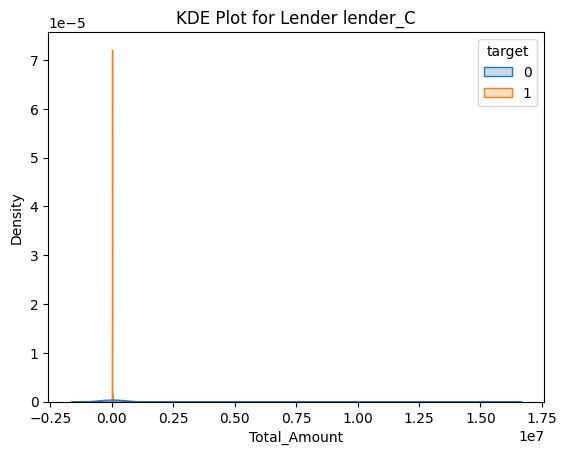

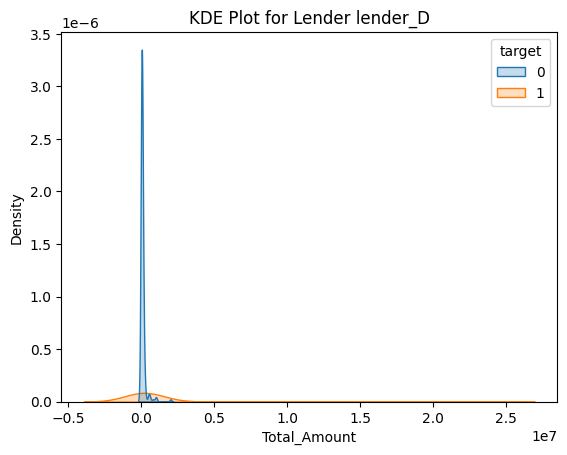

In [84]:
for lender in df['lender_id'].unique():
    # Filter the DataFrame for the current lender
    lender_df = df[df['lender_id'] == lender]
    
    # Plot the KDE for the filtered data
    sns.kdeplot(data=lender_df, x='Total_Amount', hue='target', fill=True)
    plt.title(f"KDE Plot for Lender {lender}")
    plt.show()

Test data profile

In [7]:
display('Test data', test_df.head(5), test_df.info() ,test_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18594 entries, 0 to 18593
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           18594 non-null  object        
 1   customer_id                  18594 non-null  object        
 2   country_id                   18594 non-null  object        
 3   tbl_loan_id                  18594 non-null  object        
 4   lender_id                    18594 non-null  object        
 5   loan_type                    18594 non-null  object        
 6   Total_Amount                 18594 non-null  float64       
 7   Total_Amount_to_Repay        18594 non-null  float64       
 8   disbursement_date            18594 non-null  datetime64[ns]
 9   due_date                     18594 non-null  datetime64[ns]
 10  duration                     18594 non-null  int64         
 11  New_versus_Repeat            18594 non-nu

'Test data'

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid
0,ID_269404226088267278,269404,Kenya,226088,267278,Type_1,1919.0,1989.0,2022-07-27,2022-08-03,7,Repeat Loan,575.7,0.300000,597.0
1,ID_255356300042267278,255356,Kenya,300042,267278,Type_1,2138.0,2153.0,2022-11-16,2022-11-23,7,Repeat Loan,0.0,0.000000,0.0
2,ID_257026243764267278,257026,Kenya,243764,267278,Type_1,8254.0,8304.0,2022-08-24,2022-08-31,7,Repeat Loan,207.0,0.025079,208.0
3,ID_264617299409267278,264617,Kenya,299409,267278,Type_1,3379.0,3379.0,2022-11-15,2022-11-22,7,Repeat Loan,1013.7,0.300000,1014.0
4,ID_247613296713267278,247613,Kenya,296713,267278,Type_1,120.0,120.0,2022-11-10,2022-11-17,7,Repeat Loan,36.0,0.300000,36.0


None

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid
count,18594,18594.0,18594,18594.0,18594.0,18594,1.859400e+04,1.859400e+04,18594,18594,18594.000000,18594,18594.000000,18594.000000,18594.000000
unique,18594,4962.0,2,17067.0,8.0,22,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
top,ID_248929241821267278,296718.0,Kenya,364172.0,267278.0,Type_1,NaN,NaN,NaN,NaN,NaN,Repeat Loan,NaN,NaN,NaN
freq,1,60.0,15069,3.0,14221.0,13618,NaN,NaN,NaN,NaN,NaN,18425,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.446507e+04,1.578416e+04,2022-10-08 09:20:27.879961344,2022-10-21 22:04:45.769603328,13.530763,NaN,2278.430133,0.207090,2466.451967
min,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+00,0.000000e+00,2021-11-08 00:00:00,2021-11-15 00:00:00,1.000000,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.101900e+03,2.164480e+03,2022-08-06 00:00:00,2022-08-16 06:00:00,7.000000,NaN,239.360000,0.131313,244.035000
50%,NaN,NaN,NaN,NaN,NaN,NaN,4.740000e+03,4.828000e+03,2022-09-16 00:00:00,2022-09-26 00:00:00,7.000000,NaN,744.575000,0.300000,758.920000
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.026775e+04,1.056757e+04,2022-10-27 00:00:00,2022-11-07 00:00:00,7.000000,NaN,1998.000000,0.300000,2041.000000
max,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+07,2.415284e+07,2024-11-14 00:00:00,2025-01-16 00:00:00,849.000000,NaN,400000.000000,1.000000,423400.000000


Econimic data profile

In [8]:
display('Econ data', ecno_df.head(5), ecno_df.info() ,ecno_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    27 non-null     object 
 1   Indicator  27 non-null     object 
 2   YR2001     20 non-null     float64
 3   YR2002     20 non-null     float64
 4   YR2003     20 non-null     float64
 5   YR2004     20 non-null     float64
 6   YR2005     24 non-null     float64
 7   YR2006     24 non-null     float64
 8   YR2007     24 non-null     float64
 9   YR2008     24 non-null     float64
 10  YR2009     24 non-null     float64
 11  YR2010     24 non-null     float64
 12  YR2011     24 non-null     float64
 13  YR2012     24 non-null     float64
 14  YR2013     24 non-null     float64
 15  YR2014     24 non-null     float64
 16  YR2015     21 non-null     float64
 17  YR2016     21 non-null     float64
 18  YR2017     21 non-null     float64
 19  YR2018     17 non-null     float64
 20  YR2019     1

'Econ data'

,Country,Indicator,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,...,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022,YR2023
0,Ghana,"Inflation, consumer prices (annual %)",41.509496,9.360932,29.772980,18.042739,15.438992,11.679184,10.734267,16.494640,...,15.489616,17.149970,17.454635,12.371922,7.808765,7.143640,9.887290,9.971089,31.255895,38.106966
1,Cote d'Ivoire,"Inflation, consumer prices (annual %)",4.361529,3.077265,3.296807,1.457988,3.885830,2.467191,1.892006,6.308528,...,0.448682,1.251500,0.723178,0.685881,0.359409,-1.106863,2.425007,4.091952,5.276167,4.387117
2,Kenya,"Inflation, consumer prices (annual %)",5.738598,1.961308,9.815691,11.624036,10.312778,14.453734,9.758880,26.239817,...,6.878155,6.582154,6.297250,8.005650,4.689806,5.239638,5.405162,6.107936,7.659863,7.671396
3,Ghana,"Official exchange rate (LCU per US$, period av...",0.716305,0.792417,0.866764,0.899495,0.905209,0.915107,0.932619,1.052275,...,2.896575,3.714642,3.909817,4.350533,4.585325,5.217367,5.595708,5.805700,8.272400,11.020408
4,Cote d'Ivoire,"Official exchange rate (LCU per US$, period av...",732.397693,693.713226,579.897426,527.338032,527.258363,522.425625,478.633718,446.000041,...,493.757330,591.211698,592.605615,580.656750,555.446458,585.911013,575.586005,554.530675,623.759701,606.569750


None

,Country,Indicator,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,...,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022,YR2023
count,27,27,20.000000,20.000000,20.000000,20.000000,24.000000,24.000000,24.000000,24.000000,...,24.000000,21.000000,21.000000,21.000000,17.000000,17.000000,17.000000,17.000000,14.000000,14.000000
unique,3,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Ghana,"Inflation, consumer prices (annual %)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,9,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,210.842603,206.489954,201.026417,196.937123,164.782692,163.548217,161.936892,161.543137,...,164.375498,188.461056,189.086003,188.011613,229.192362,230.834145,230.824774,229.991393,60.578945,61.707586
std,NaN,NaN,415.661401,414.344484,407.896288,406.192474,376.384006,376.638599,374.801141,373.276370,...,374.796407,402.329144,402.171491,401.833615,436.561975,438.135892,437.353611,436.170093,164.827016,160.847507
min,NaN,NaN,0.716305,0.792417,0.866764,0.899495,-0.558333,-8.009867,-3.061667,-3.140000,...,-1.920000,-1.844167,-1.630000,-1.350000,0.359409,-1.106863,2.425007,2.590000,2.434000,2.403000
25%,NaN,NaN,6.414025,5.508667,7.256000,5.708814,5.803748,4.385458,4.802235,5.102542,...,4.127750,3.714642,5.237000,4.350533,4.585325,5.014000,5.405162,5.693000,5.408375,4.736109
50%,NaN,NaN,18.739167,15.942642,13.661172,13.078333,8.981250,8.691124,8.536963,9.999904,...,8.311229,6.897669,7.871005,6.490000,8.292700,7.506070,6.968703,7.427581,7.402519,8.419543
75%,NaN,NaN,50.772921,48.073822,46.555495,47.483551,28.444069,26.845454,29.629276,30.417882,...,33.005013,17.149970,17.454635,14.062500,101.301574,101.991298,106.450780,109.637747,12.264902,13.045543


Train Data tests

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           68654 non-null  object        
 1   customer_id                  68654 non-null  object        
 2   country_id                   68654 non-null  object        
 3   tbl_loan_id                  68654 non-null  object        
 4   lender_id                    68654 non-null  object        
 5   loan_type                    68654 non-null  object        
 6   Total_Amount                 68654 non-null  float64       
 7   Total_Amount_to_Repay        68654 non-null  float64       
 8   disbursement_date            68654 non-null  datetime64[ns]
 9   due_date                     68654 non-null  datetime64[ns]
 10  duration                     68654 non-null  int64         
 11  New_versus_Repeat            68654 non-nu

Test data tests

In [10]:
test_df['country_id'].unique()

array(['Kenya', 'Ghana'], dtype=object)

Economic Indicators Data

In [11]:
col_map = {year:year.strip('YR') for year in ecno_df.columns}

In [12]:
ecno_df = ecno_df[ecno_df['Country'] != "Cote d'Ivoire"]
ecno_df.rename(columns = col_map, inplace= True)
ecno_df

,Country,Indicator,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Ghana,"Inflation, consumer prices (annual %)",41.509496,9.360932,29.772980,18.042739,15.438992,11.679184,10.734267,16.494640,...,15.489616,17.149970,17.454635,12.371922,7.808765,7.143640,9.887290,9.971089,31.255895,38.106966
2,Kenya,"Inflation, consumer prices (annual %)",5.738598,1.961308,9.815691,11.624036,10.312778,14.453734,9.758880,26.239817,...,6.878155,6.582154,6.297250,8.005650,4.689806,5.239638,5.405162,6.107936,7.659863,7.671396
3,Ghana,"Official exchange rate (LCU per US$, period av...",0.716305,0.792417,0.866764,0.899495,0.905209,0.915107,0.932619,1.052275,...,2.896575,3.714642,3.909817,4.350533,4.585325,5.217367,5.595708,5.805700,8.272400,11.020408
5,Kenya,"Official exchange rate (LCU per US$, period av...",78.563195,78.749142,75.935569,79.173876,75.554109,72.100835,67.317638,69.175320,...,87.922164,98.178453,101.504369,103.410005,101.301574,101.991298,106.450780,109.637747,117.865989,139.846384
6,Ghana,Real interest rate (%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Kenya,Real interest rate (%),17.812501,17.358141,9.770511,5.045258,7.609988,-8.009867,4.819091,-0.984997,...,8.249079,6.268806,10.118129,5.656748,8.487960,7.831101,6.714634,7.427581,5.968447,6.546517
9,Ghana,Average precipitation in depth (mm per year),1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,...,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,NaN,NaN
11,Kenya,Average precipitation in depth (mm per year),630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,...,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,NaN,NaN
12,Ghana,Deposit interest rate (%),30.854167,16.208333,14.323333,13.625000,10.162500,8.885417,8.895833,11.285000,...,12.904167,13.339167,13.041667,14.062500,12.083333,11.500000,11.500000,11.500000,12.052083,11.416667
14,Kenya,Deposit interest rate (%),6.639167,5.486667,4.133333,2.433333,5.082500,5.138703,5.162251,5.302131,...,8.373380,9.188945,8.688626,7.674123,8.292700,7.506070,6.968703,6.686974,7.145176,9.167690
